Main question: Do countries with equal pay laws have smaller gender pay gaps? 

Data
1. total_df.csv: made by Kasia from ILO data on average monthly earnings by females and males (total, not by industry), from 2011 to 2021. For each country, data from earliest and latest years available. Some countries only have data from one year. 
2. WBL_1971_2022.xlsx: data from World Bank's Women, Business, and the Law. The sheet "Pay" has country-level data for each year on (a) overall score, (b) whether the law mandates equal pay for work of equal value. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

In [2]:
df1 = pd.read_csv('total_df.csv')
df1.head()

,Unnamed: 0,country,year,ratio
0,109,Afghanistan,2020,0.806813
1,0,Afghanistan,2014,0.603998
2,1,Albania,2012,0.867946
3,110,Albania,2020,0.934241
4,111,Argentina,2021,0.746342


In [3]:
df1 = df1.iloc[:,1:]
df1.head()

,country,year,ratio
0,Afghanistan,2020,0.806813
1,Afghanistan,2014,0.603998
2,Albania,2012,0.867946
3,Albania,2020,0.934241
4,Argentina,2021,0.746342


In [4]:
df1.shape

(246, 3)

In [5]:
df1['country'].nunique()

137

In [6]:
df2 = pd.read_excel('WBL_1971_2022.xlsx', sheet_name='Pay')
df2.head()

,Economy,Economy Code,ISO Code,Region,Income Group,Report Year,PAY SCORE,Does the law mandate equal remuneration for work of equal value?,Score,Legal Basis,Can a woman work at night in the same way as a man?,Score.1,Legal Basis.1,Can a woman work in a job deemed dangerous in the same way as a man?,Score.2,Legal Basis.2,Can a woman work in an industrial job in the same way as a man?,Score.3,Legal Basis.3
0,Afghanistan,AFG,AFG,South Asia,Low income,1971,0,No,0,No applicable provisions could be located,No,0,Labor Law,No,0,Labor Law,No,0,Labor Law
1,Afghanistan,AFG,AFG,South Asia,Low income,1972,0,No,0,No applicable provisions could be located,No,0,Labor Law,No,0,Labor Law,No,0,Labor Law
2,Afghanistan,AFG,AFG,South Asia,Low income,1973,0,No,0,No applicable provisions could be located,No,0,Labor Law,No,0,Labor Law,No,0,Labor Law
3,Afghanistan,AFG,AFG,South Asia,Low income,1974,0,No,0,No applicable provisions could be located,No,0,Labor Law,No,0,Labor Law,No,0,Labor Law
4,Afghanistan,AFG,AFG,South Asia,Low income,1975,0,No,0,No applicable provisions could be located,No,0,Labor Law,No,0,Labor Law,No,0,Labor Law


In [7]:
df2 = df2.rename(columns={'Economy':'country', 'Region':'region', 'Income Group':'country_group', 
                          'Report Year':'year', 'PAY SCORE':'pay_score',
                          'Does the law mandate equal remuneration for work of equal value?':'equal_pay_law', 
                          'Score':'law_score'})
df2.head()

,country,Economy Code,ISO Code,region,country_group,year,pay_score,equal_pay_law,law_score,Legal Basis,Can a woman work at night in the same way as a man?,Score.1,Legal Basis.1,Can a woman work in a job deemed dangerous in the same way as a man?,Score.2,Legal Basis.2,Can a woman work in an industrial job in the same way as a man?,Score.3,Legal Basis.3
0,Afghanistan,AFG,AFG,South Asia,Low income,1971,0,No,0,No applicable provisions could be located,No,0,Labor Law,No,0,Labor Law,No,0,Labor Law
1,Afghanistan,AFG,AFG,South Asia,Low income,1972,0,No,0,No applicable provisions could be located,No,0,Labor Law,No,0,Labor Law,No,0,Labor Law
2,Afghanistan,AFG,AFG,South Asia,Low income,1973,0,No,0,No applicable provisions could be located,No,0,Labor Law,No,0,Labor Law,No,0,Labor Law
3,Afghanistan,AFG,AFG,South Asia,Low income,1974,0,No,0,No applicable provisions could be located,No,0,Labor Law,No,0,Labor Law,No,0,Labor Law
4,Afghanistan,AFG,AFG,South Asia,Low income,1975,0,No,0,No applicable provisions could be located,No,0,Labor Law,No,0,Labor Law,No,0,Labor Law


In [8]:
df2 = df2[['country','region','country_group','year','pay_score','equal_pay_law','law_score']]
df2.head()

,country,region,country_group,year,pay_score,equal_pay_law,law_score
0,Afghanistan,South Asia,Low income,1971,0,No,0
1,Afghanistan,South Asia,Low income,1972,0,No,0
2,Afghanistan,South Asia,Low income,1973,0,No,0
3,Afghanistan,South Asia,Low income,1974,0,No,0
4,Afghanistan,South Asia,Low income,1975,0,No,0


In [9]:
df2.shape

(9880, 7)

In [10]:
df2['country'].nunique()

190

In [11]:
# merge on country and year 

df3 = df1.merge(df2, on=['country','year'])
df3.head()

,country,year,ratio,region,country_group,pay_score,equal_pay_law,law_score
0,Afghanistan,2020,0.806813,South Asia,Low income,0,No,0
1,Afghanistan,2014,0.603998,South Asia,Low income,0,No,0
2,Albania,2012,0.867946,Europe & Central Asia,Upper middle income,75,No,0
3,Albania,2020,0.934241,Europe & Central Asia,Upper middle income,100,Yes,1
4,Argentina,2021,0.746342,Latin America & Caribbean,Upper middle income,50,Yes,1


In [12]:
df3.shape

(219, 8)

In [13]:
df3['country'].nunique()

121

In [14]:
# df1 had 137 unique countries, while df2 had 190 
# which ones are not in here? 

df1_countries = df1['country'].to_list()
df2_countries = df2['country'].to_list()
df3_countries = df3['country'].to_list()

set(df1_countries) ^ set(df3_countries)

{'Bermuda',
 'Cape Verde',
 'Congo, Democratic Republic of the',
 'Czechia',
 'Egypt',
 'Gambia',
 'Hong Kong, China',
 'Korea, Republic of',
 "Lao People's Democratic Republic",
 'Macau, China',
 'Réunion',
 'Slovakia',
 'Tanzania, United Republic of',
 'Türkiye',
 'Viet Nam',
 'Yemen'}

In [15]:
set(df2_countries) ^ set(df3_countries)

{'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Bahamas, The',
 'Bahrain',
 'Benin',
 'Cabo Verde',
 'Central African Republic',
 'China',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Czech Republic',
 'Dominica',
 'Egypt, Arab Rep.',
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia, The',
 'Grenada',
 'Haiti',
 'Hong Kong SAR, China',
 'Iran, Islamic Rep.',
 'Iraq',
 'Japan',
 'Kiribati',
 'Korea, Rep.',
 'Kosovo',
 'Kuwait',
 'Kyrgyz Republic',
 'Lao PDR',
 'Liberia',
 'Libya',
 'Mauritania',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Montenegro',
 'Morocco',
 'Mozambique',
 'New Zealand',
 'Niger',
 'North Macedonia',
 'Oman',
 'Palau',
 'Papua New Guinea',
 'Puerto Rico',
 'San Marino',
 'Seychelles',
 'Slovak Republic',
 'Solomon Islands',
 'Somalia',
 'South Sudan',
 'St. Kitts and Nevis',
 'St. Lucia',
 'St. Vincent and the Grenadines',
 'Sudan',
 'Syrian Arab Republic',
 'São Tomé and Príncipe',
 'Taiwan, China',
 'Tajikistan',
 'Tanzania',
 'Tunisia',
 'Turkey',
 'United Arab Emir

In [16]:
# edit the country names in df1 and df2 so they don't get dropped during the merge 

df1_edit = {'Congo, Democratic Republic of the':'Congo, Dem. Rep.', 'Hong Kong, China':'Hong Kong', 
            'Korea, Republic of':'Korea', "Lao People's Democratic Republic":'Lao PDR', 
            'Tanzania, United Republic of':'Tanzania', 'Viet Nam':'Vietnam'}

df2_edit = {'Cabo Verde':'Cape Verde', 'Czech Republic':'Czechia', 'Egypt, Arab Rep.':'Egypt', 
            'Gambia, The':'Gambia', 'Hong Kong SAR, China':'Hong Kong', 'Korea, Rep.':'Korea', 
            'Slovak Republic':'Slovakia', 'Turkey':'Türkiye', 'Yemen, Rep.':'Yemen'}

df1 = df1.replace(df1_edit)
df2 = df2.replace(df2_edit)

In [17]:
df1[df1['country'] == 'Korea']

,country,year,ratio
124,Korea,2021,0.660513
125,Korea,2011,0.640400


In [18]:
df2[df2['country']=='Hong Kong'].head()

,country,region,country_group,year,pay_score,equal_pay_law,law_score
3744,Hong Kong,East Asia & Pacific,High income,1971,75,No,0
3745,Hong Kong,East Asia & Pacific,High income,1972,75,No,0
3746,Hong Kong,East Asia & Pacific,High income,1973,75,No,0
3747,Hong Kong,East Asia & Pacific,High income,1974,75,No,0
3748,Hong Kong,East Asia & Pacific,High income,1975,75,No,0


In [19]:
# repeat merge 
df3 = df1.merge(df2, on=['country', 'year'])
df3.head()

,country,year,ratio,region,country_group,pay_score,equal_pay_law,law_score
0,Afghanistan,2020,0.806813,South Asia,Low income,0,No,0
1,Afghanistan,2014,0.603998,South Asia,Low income,0,No,0
2,Albania,2012,0.867946,Europe & Central Asia,Upper middle income,75,No,0
3,Albania,2020,0.934241,Europe & Central Asia,Upper middle income,100,Yes,1
4,Argentina,2021,0.746342,Latin America & Caribbean,Upper middle income,50,Yes,1


In [20]:
df3.shape

(241, 8)

In [21]:
df3['country'].nunique()

134

In [22]:
# went from 121 to 134 unique countries 
# it could be that we're missing some rows from df1 because they don't have the corresponding years in df2 
# I'm ok with this number of countries 

In [23]:
# focus on the most recent year for each country 

df4 = df3.merge(df3, on=['country','region','country_group'], suffixes=['_a', '_b'])
df4.head()

,country,year_a,ratio_a,region,country_group,pay_score_a,equal_pay_law_a,law_score_a,year_b,ratio_b,pay_score_b,equal_pay_law_b,law_score_b
0,Afghanistan,2020,0.806813,South Asia,Low income,0,No,0,2020,0.806813,0,No,0
1,Afghanistan,2020,0.806813,South Asia,Low income,0,No,0,2014,0.603998,0,No,0
2,Afghanistan,2014,0.603998,South Asia,Low income,0,No,0,2020,0.806813,0,No,0
3,Afghanistan,2014,0.603998,South Asia,Low income,0,No,0,2014,0.603998,0,No,0
4,Albania,2012,0.867946,Europe & Central Asia,Upper middle income,75,No,0,2012,0.867946,75,No,0


In [24]:
df4.shape

(455, 13)

In [25]:
df5 = df4[df4['year_a'] < df4['year_b']]
df5.head()

,country,year_a,ratio_a,region,country_group,pay_score_a,equal_pay_law_a,law_score_a,year_b,ratio_b,pay_score_b,equal_pay_law_b,law_score_b
2,Afghanistan,2014,0.603998,South Asia,Low income,0,No,0,2020,0.806813,0,No,0
5,Albania,2012,0.867946,Europe & Central Asia,Upper middle income,75,No,0,2020,0.934241,100,Yes,1
10,Argentina,2011,0.746261,Latin America & Caribbean,Upper middle income,50,Yes,1,2021,0.746342,50,Yes,1
14,Armenia,2013,0.634726,Europe & Central Asia,Upper middle income,75,No,0,2020,0.701357,75,No,0
18,Australia,2011,0.662470,High income: OECD,High income,100,Yes,1,2020,0.702274,100,Yes,1


In [26]:
df5.shape

(107, 13)

In [27]:
df5['country'].nunique() # the subset above got rid of the countries with only 1 year 

107

In [28]:
# subset the most recent data 

df6 = df5[['country','region','country_group','year_b','ratio_b', 'pay_score_b',
           'equal_pay_law_b', 'law_score_b']].reset_index()

df6.head()

,index,country,region,country_group,year_b,ratio_b,pay_score_b,equal_pay_law_b,law_score_b
0,2,Afghanistan,South Asia,Low income,2020,0.806813,0,No,0
1,5,Albania,Europe & Central Asia,Upper middle income,2020,0.934241,100,Yes,1
2,10,Argentina,Latin America & Caribbean,Upper middle income,2021,0.746342,50,Yes,1
3,14,Armenia,Europe & Central Asia,Upper middle income,2020,0.701357,75,No,0
4,18,Australia,High income: OECD,High income,2020,0.702274,100,Yes,1


In [29]:
df6 = df6.iloc[:,1:]
df6.head()

,country,region,country_group,year_b,ratio_b,pay_score_b,equal_pay_law_b,law_score_b
0,Afghanistan,South Asia,Low income,2020,0.806813,0,No,0
1,Albania,Europe & Central Asia,Upper middle income,2020,0.934241,100,Yes,1
2,Argentina,Latin America & Caribbean,Upper middle income,2021,0.746342,50,Yes,1
3,Armenia,Europe & Central Asia,Upper middle income,2020,0.701357,75,No,0
4,Australia,High income: OECD,High income,2020,0.702274,100,Yes,1


In [30]:
df6.shape

(107, 8)

In [31]:
df6['country'].nunique()

107

In [32]:
# get data from the countries dropped from df4 -> df5 because they only had 1 year 

df6_countries = df6['country'].to_list()
df7 = df4[~df4['country'].isin(df6_countries)]
df7.head()

,country,year_a,ratio_a,region,country_group,pay_score_a,equal_pay_law_a,law_score_a,year_b,ratio_b,pay_score_b,equal_pay_law_b,law_score_b
32,Barbados,2016,0.952443,Latin America & Caribbean,High income,50,No,0,2016,0.952443,50,No,0
65,Brunei Darussalam,2014,0.892703,East Asia & Pacific,High income,75,No,0,2014,0.892703,75,No,0
70,Burkina Faso,2018,0.703648,Sub-Saharan Africa,Low income,25,No,0,2018,0.703648,25,No,0
71,Burundi,2020,0.827633,Sub-Saharan Africa,Low income,75,No,0,2020,0.827633,75,No,0
76,Cameroon,2014,0.556548,Sub-Saharan Africa,Lower middle income,25,No,0,2014,0.556548,25,No,0


In [33]:
df7.shape

(27, 13)

In [34]:
# subset df7 to match the columns in df6 

df7 = df7[['country','region','country_group','year_b','ratio_b', 'pay_score_b',
              'equal_pay_law_b', 'law_score_b']].reset_index()

df7.head()

,index,country,region,country_group,year_b,ratio_b,pay_score_b,equal_pay_law_b,law_score_b
0,32,Barbados,Latin America & Caribbean,High income,2016,0.952443,50,No,0
1,65,Brunei Darussalam,East Asia & Pacific,High income,2014,0.892703,75,No,0
2,70,Burkina Faso,Sub-Saharan Africa,Low income,2018,0.703648,25,No,0
3,71,Burundi,Sub-Saharan Africa,Low income,2020,0.827633,75,No,0
4,76,Cameroon,Sub-Saharan Africa,Lower middle income,2014,0.556548,25,No,0


In [35]:
df7 = df7.iloc[:,1:]
df7.head()

,country,region,country_group,year_b,ratio_b,pay_score_b,equal_pay_law_b,law_score_b
0,Barbados,Latin America & Caribbean,High income,2016,0.952443,50,No,0
1,Brunei Darussalam,East Asia & Pacific,High income,2014,0.892703,75,No,0
2,Burkina Faso,Sub-Saharan Africa,Low income,2018,0.703648,25,No,0
3,Burundi,Sub-Saharan Africa,Low income,2020,0.827633,75,No,0
4,Cameroon,Sub-Saharan Africa,Lower middle income,2014,0.556548,25,No,0


In [36]:
# combine df6 and df7 

df8 = pd.concat([df6,df7])
df8.head()

,country,region,country_group,year_b,ratio_b,pay_score_b,equal_pay_law_b,law_score_b
0,Afghanistan,South Asia,Low income,2020,0.806813,0,No,0
1,Albania,Europe & Central Asia,Upper middle income,2020,0.934241,100,Yes,1
2,Argentina,Latin America & Caribbean,Upper middle income,2021,0.746342,50,Yes,1
3,Armenia,Europe & Central Asia,Upper middle income,2020,0.701357,75,No,0
4,Australia,High income: OECD,High income,2020,0.702274,100,Yes,1


In [37]:
df8.shape

(134, 8)

In [38]:
# gut check: there should be the same number of unique countries as the number of rows 

df8['country'].nunique()

134

In [39]:
df8_sorted = df8.sort_values('country')
df8_sorted.head(20)

,country,region,country_group,year_b,ratio_b,pay_score_b,equal_pay_law_b,law_score_b
0,Afghanistan,South Asia,Low income,2020,0.806813,0,No,0
1,Albania,Europe & Central Asia,Upper middle income,2020,0.934241,100,Yes,1
2,Argentina,Latin America & Caribbean,Upper middle income,2021,0.746342,50,Yes,1
3,Armenia,Europe & Central Asia,Upper middle income,2020,0.701357,75,No,0
4,Australia,High income: OECD,High income,2020,0.702274,100,Yes,1
5,Austria,High income: OECD,High income,2020,0.699590,100,Yes,1
6,Azerbaijan,Europe & Central Asia,Upper middle income,2021,0.658257,0,No,0
7,Bangladesh,South Asia,Lower middle income,2017,0.918125,25,No,0
0,Barbados,Latin America & Caribbean,High income,2016,0.952443,50,No,0
8,Belarus,Europe & Central Asia,Upper middle income,2021,0.711156,50,Yes,1


In [40]:
df8.describe()

,year_b,ratio_b,pay_score_b,law_score_b
count,134.000000,134.000000,134.000000,134.000000
mean,2018.895522,0.851422,70.335821,0.514925
std,2.114286,0.237906,28.948994,0.501653
min,2012.000000,0.326706,0.000000,0.000000
25%,2018.000000,0.753897,50.000000,0.000000
50%,2020.000000,0.834094,75.000000,1.000000
75%,2020.000000,0.907515,100.000000,1.000000
max,2021.000000,3.144198,100.000000,1.000000


In [41]:
# notice the max ratio for female:male income is 3.144 
# is this actually believable? 
# let's pull up those with ratios > 1.1, i.e. women get paid 10% or more than men 

df9 = df8[df8['ratio_b']>1.1]
df9

,country,region,country_group,year_b,ratio_b,pay_score_b,equal_pay_law_b,law_score_b
41,Honduras,Latin America & Caribbean,Lower middle income,2020,1.213357,50,No,0
68,Nicaragua,Latin America & Caribbean,Lower middle income,2014,1.145451,75,No,0
72,Panama,Latin America & Caribbean,Upper middle income,2021,1.101188,50,No,0
82,Samoa,East Asia & Pacific,Lower middle income,2017,1.104368,75,No,0
96,Timor-Leste,East Asia & Pacific,Lower middle income,2016,3.144198,100,Yes,1
20,Marshall Islands,East Asia & Pacific,Upper middle income,2019,1.138307,75,No,0


In [42]:
# I think it's safe to drop Timor-Leste from this analysis since the number here seems to be a fluke 
# based on information from UNDP: https://www.undp.org/timor-leste/gender-equality 

df8 = df8.drop(index=96, axis=0)
df8.shape

(133, 8)

In [43]:
df8[df8['ratio_b']>1.1] # confirm Timor Leste is no longer included here 

,country,region,country_group,year_b,ratio_b,pay_score_b,equal_pay_law_b,law_score_b
41,Honduras,Latin America & Caribbean,Lower middle income,2020,1.213357,50,No,0
68,Nicaragua,Latin America & Caribbean,Lower middle income,2014,1.145451,75,No,0
72,Panama,Latin America & Caribbean,Upper middle income,2021,1.101188,50,No,0
82,Samoa,East Asia & Pacific,Lower middle income,2017,1.104368,75,No,0
20,Marshall Islands,East Asia & Pacific,Upper middle income,2019,1.138307,75,No,0


In [44]:
# reset index for df8 because of the concat (duplicate index numbers mess with visualization)

df8 = df8.reset_index()
df8.head()

,index,country,region,country_group,year_b,ratio_b,pay_score_b,equal_pay_law_b,law_score_b
0,0,Afghanistan,South Asia,Low income,2020,0.806813,0,No,0
1,1,Albania,Europe & Central Asia,Upper middle income,2020,0.934241,100,Yes,1
2,2,Argentina,Latin America & Caribbean,Upper middle income,2021,0.746342,50,Yes,1
3,3,Armenia,Europe & Central Asia,Upper middle income,2020,0.701357,75,No,0
4,4,Australia,High income: OECD,High income,2020,0.702274,100,Yes,1


In [45]:
df8 = df8.iloc[:,1:]
df8.head()

,country,region,country_group,year_b,ratio_b,pay_score_b,equal_pay_law_b,law_score_b
0,Afghanistan,South Asia,Low income,2020,0.806813,0,No,0
1,Albania,Europe & Central Asia,Upper middle income,2020,0.934241,100,Yes,1
2,Argentina,Latin America & Caribbean,Upper middle income,2021,0.746342,50,Yes,1
3,Armenia,Europe & Central Asia,Upper middle income,2020,0.701357,75,No,0
4,Australia,High income: OECD,High income,2020,0.702274,100,Yes,1


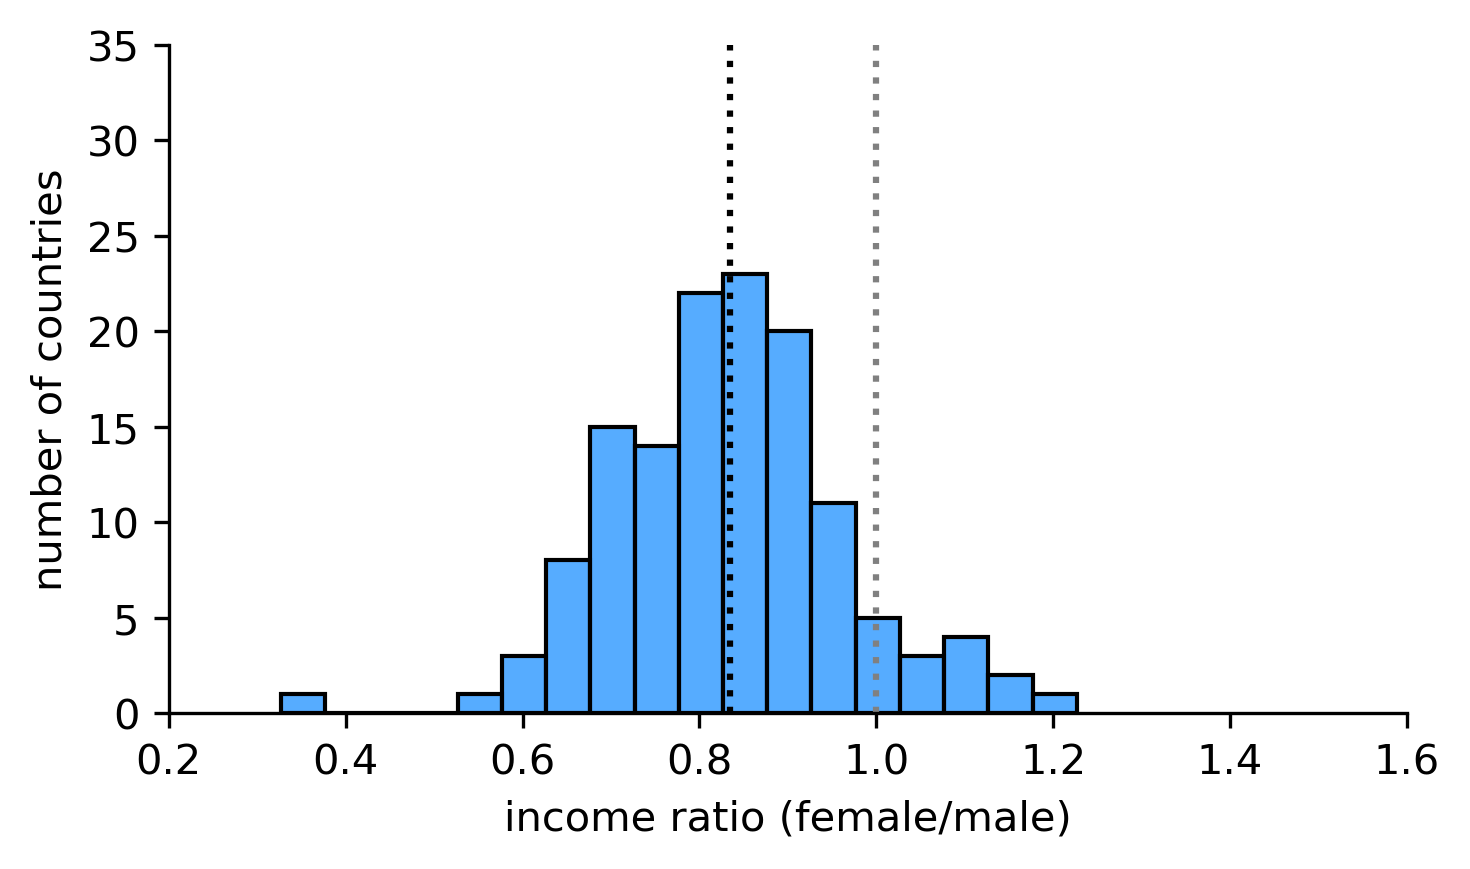

In [48]:
# distribution of income ratios 
plt.subplots(figsize=(5,3), dpi=300)
g = sns.histplot(df8, x='ratio_b', binwidth=0.05, color='dodgerblue')
g.set(xlabel='income ratio (female/male)',
      ylabel='number of countries', xlim=(0.2,1.6), ylim=(0,35))
plt.axvline(df8['ratio_b'].mean(), color='black', ls='dotted')
plt.axvline(1, color='gray', ls='dotted')
sns.despine()
plt.tight_layout()
plt.savefig('figure1_histogram_income_ratio_133_countries.png')
plt.show()

In [49]:
# find means of income ratios by equal pay laws 

eql_yes = df8[df8['equal_pay_law_b']=='Yes']['ratio_b'].mean()
eql_no = df8[df8['equal_pay_law_b']=='No']['ratio_b'].mean()

In [50]:
# rename df8 column names for easier legends later on 

df8 = df8.rename(columns={'ratio_b':'ratio', 'equal_pay_law_b':'Equal pay mandate'})
df8.head()

,country,region,country_group,year_b,ratio,pay_score_b,Equal pay mandate,law_score_b
0,Afghanistan,South Asia,Low income,2020,0.806813,0,No,0
1,Albania,Europe & Central Asia,Upper middle income,2020,0.934241,100,Yes,1
2,Argentina,Latin America & Caribbean,Upper middle income,2021,0.746342,50,Yes,1
3,Armenia,Europe & Central Asia,Upper middle income,2020,0.701357,75,No,0
4,Australia,High income: OECD,High income,2020,0.702274,100,Yes,1


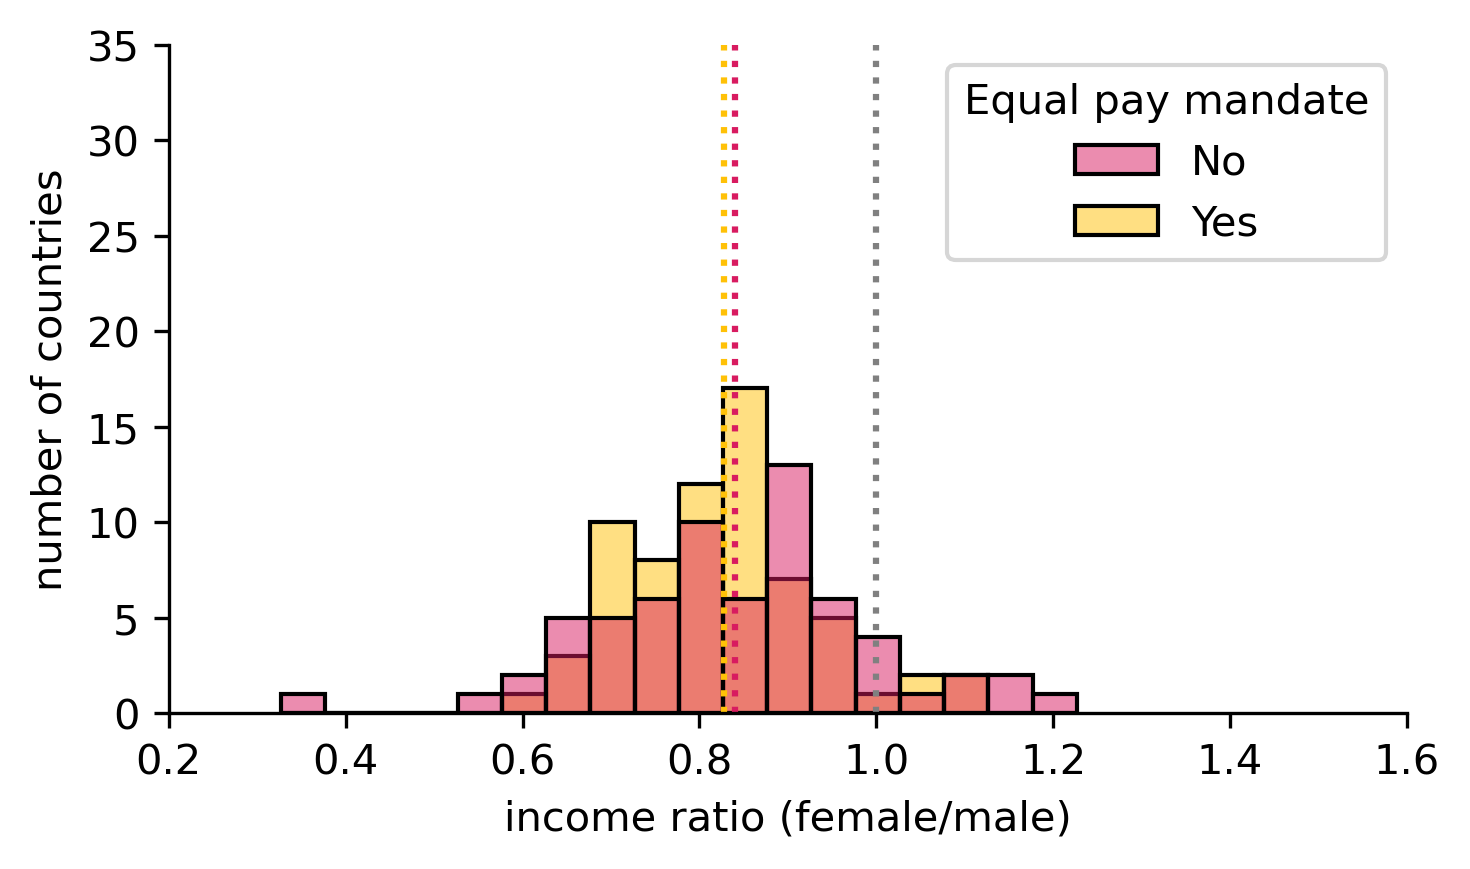

In [51]:
# distribution of income ratio, grouped by equal pay laws

custom_palette=['#D81B60','#FFC107']

plt.subplots(figsize=(5,3), dpi=300)
g = sns.histplot(df8, x='ratio', binwidth=0.05, hue='Equal pay mandate', palette=custom_palette)
g.set(xlabel='income ratio (female/male)',
      ylabel='number of countries', xlim=(0.2,1.6), ylim=(0,35))
plt.axvline(eql_yes, color='#FFC107', ls='dotted') 
plt.axvline(eql_no, color='#D81B60', ls='dotted')
plt.axvline(1, color='gray', ls='dotted')
sns.despine()
plt.tight_layout()
plt.savefig('figure2_histogram_income_ratio_133_countries_equal_pay_mandate.png')
plt.show()

The average f/m income ratios seem similar between countries with and without equal pay mandates. 
CAVEAT: to be fair, this is based on MOST RECENTLY AVAILABLE DATA. If there have been changes in law, or progress towards pay parity since the last timepoint (especially for countries with data from before 2015), we wouldn't see them here. 

In [52]:
# checking if those with higher pay scores have higher income ratios (one would think so)

ratios_by_payscore = df8.groupby('pay_score_b')['ratio'].agg([np.mean, 'count'])

In [53]:
ratios_by_payscore

,mean,count
pay_score_b,,
0,0.758381,5
25,0.780116,16
50,0.850952,26
75,0.869625,39
100,0.821966,47


In [ ]:
# interesting that the average income ratio for countries with score of 100 is actually lower than that for countries with score of 50 or 75 
# the World Bank's Gender Pay Gap Score is based on presence/absence of LAWS 
# but not so much whether/to what degree they are implemented 

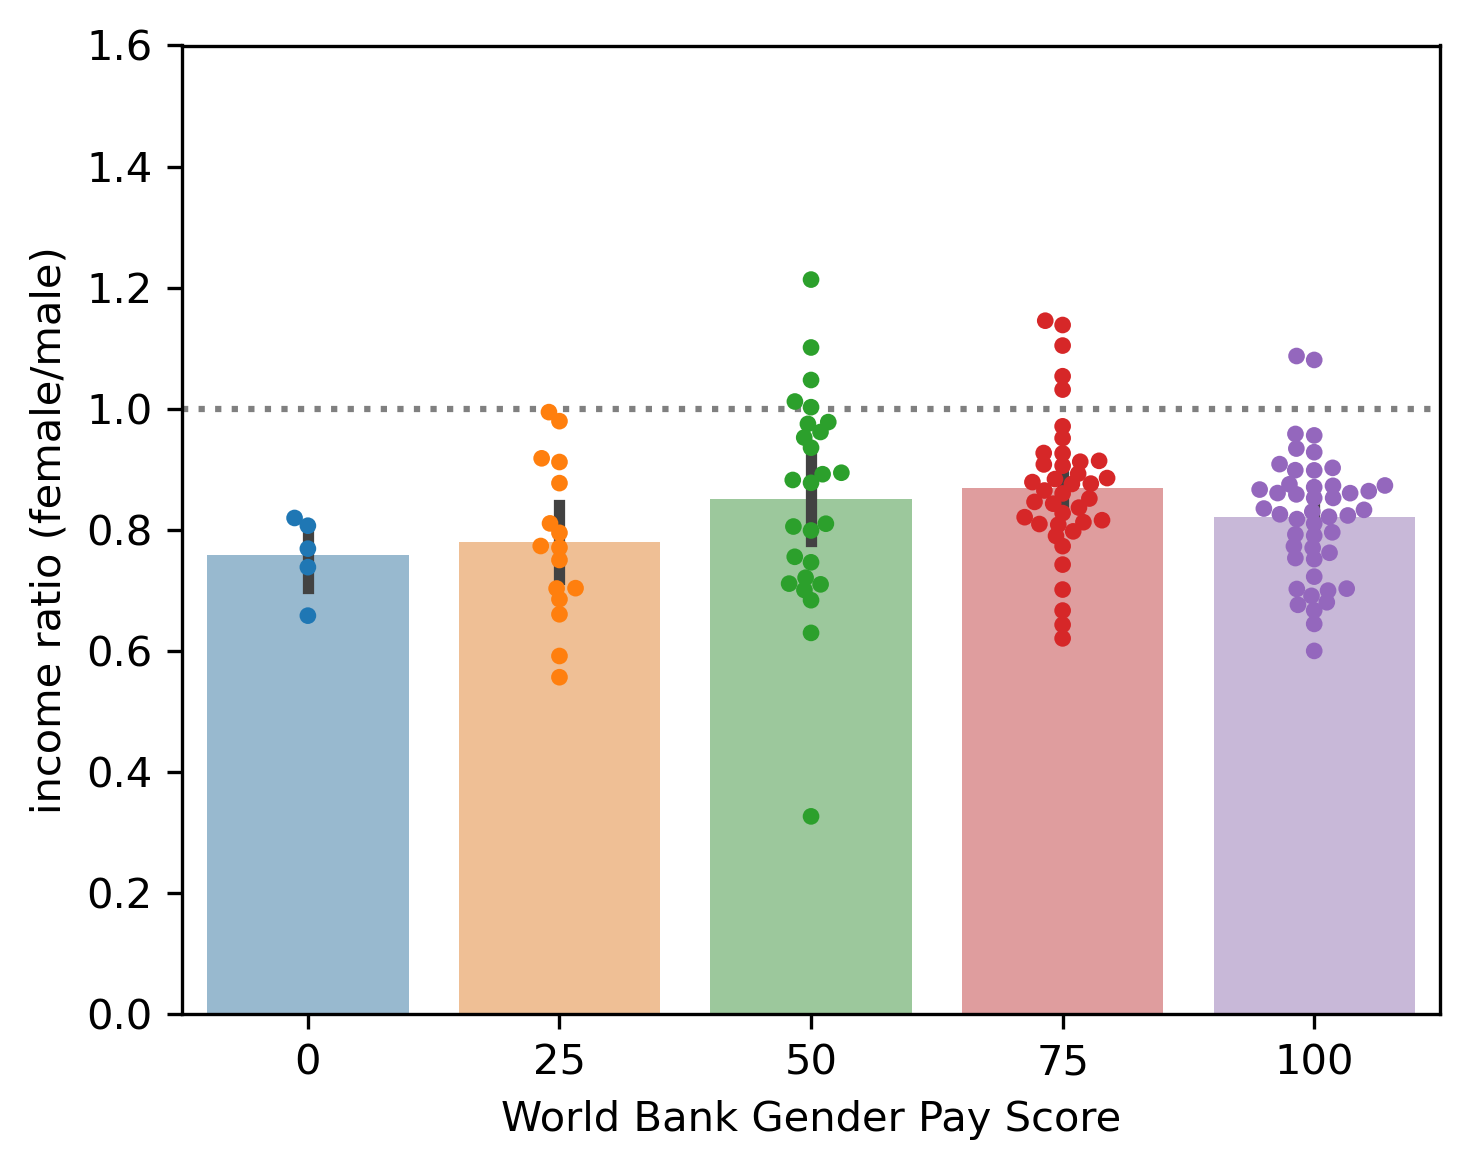

In [54]:
a = plt.subplots(figsize=(5,4), dpi=300)
a = sns.swarmplot(data=df8, x='pay_score_b', y='ratio', size=4)
a = sns.barplot(data=df8, x='pay_score_b', y='ratio', alpha=0.5)
a.set(xlabel='World Bank Gender Pay Score', ylabel='income ratio (female/male)', ylim=(0,1.6))
plt.axhline(1, color='gray', ls='dotted')
plt.tight_layout()
plt.savefig('figure4_swarmplot_ratio_by_payscore.png')
plt.show()

In [55]:
# countries that have income ratio < 0.5 (men make $2 or more for every $1 that women make)

df10 = df8[df8['ratio'] <= 0.5]
df10

,country,region,country_group,year_b,ratio,pay_score_b,Equal pay mandate,law_score_b
37,Ghana,Sub-Saharan Africa,Lower middle income,2017,0.326706,50,No,0


In [56]:
# do countries in the same income group have similar gender pay gaps? 

ratio_country_income = df8.groupby('country_group')['ratio'].agg([np.mean, np.std])
ratio_country_income

,mean,std
country_group,,
High income,0.795411,0.082162
Low income,0.760080,0.090214
Lower middle income,0.857540,0.168138
Upper middle income,0.889695,0.123273


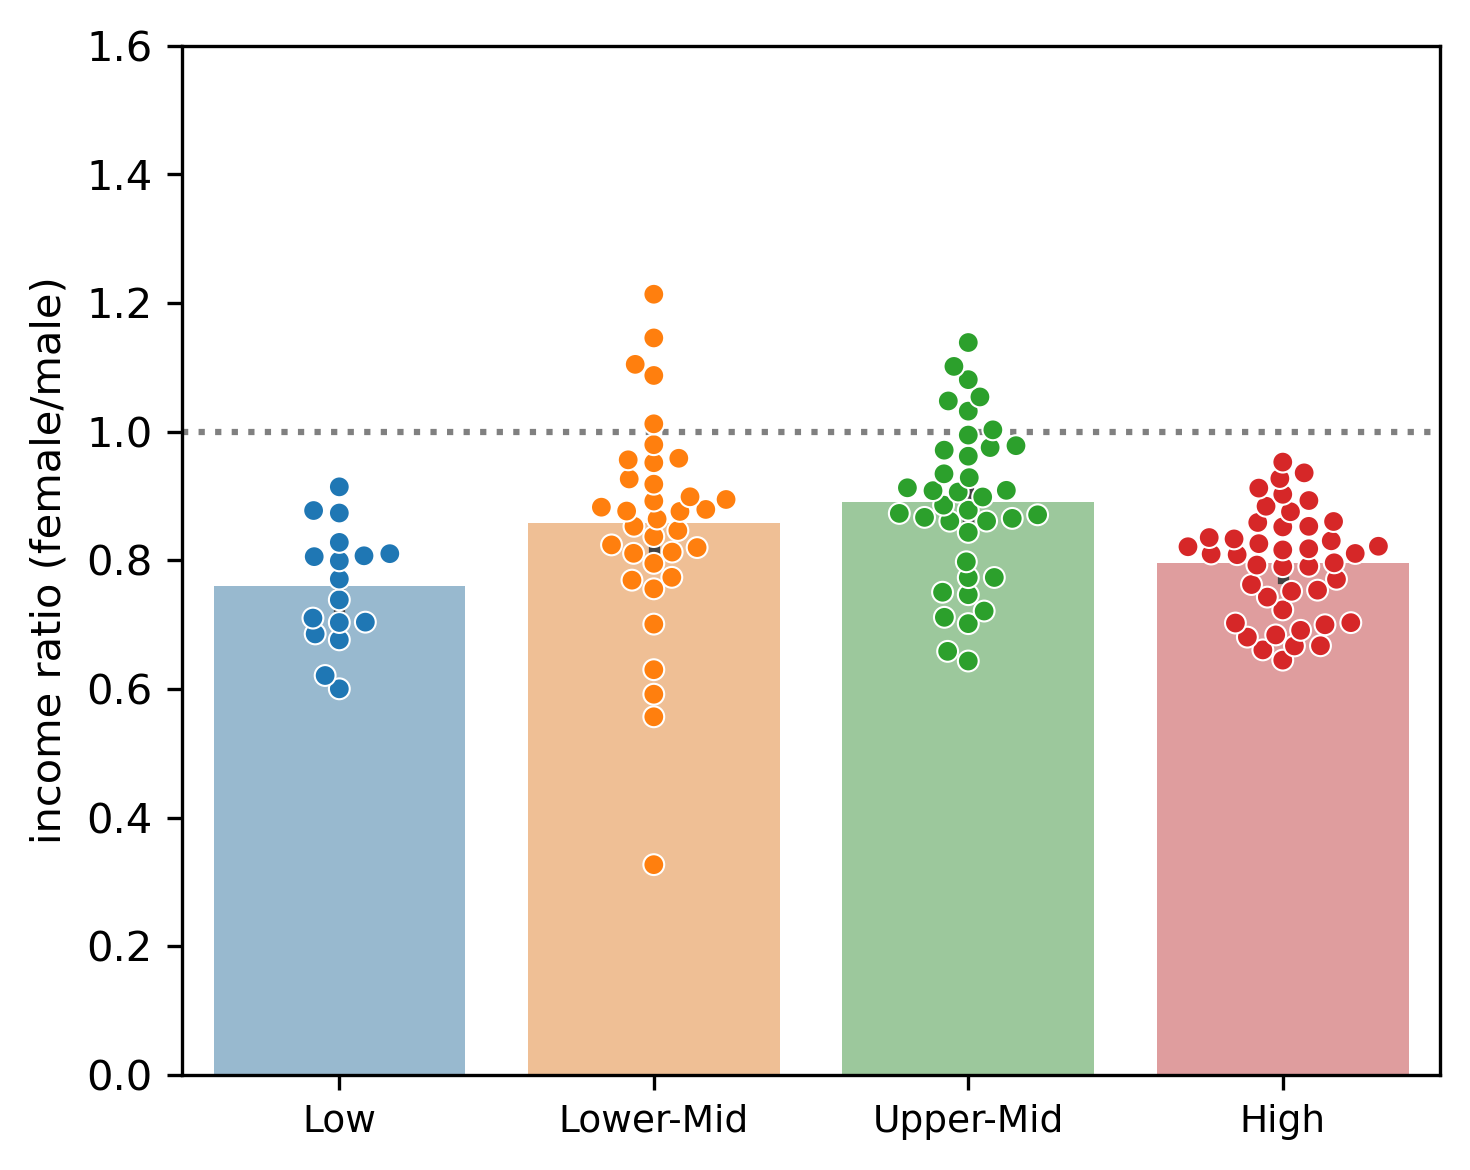

In [57]:
# let's look at the distribution

income_order = ['Low income', 'Lower middle income', 'Upper middle income', 'High income']
income_labels = ['Low', 'Lower-Mid', 'Upper-Mid', 'High']

fig, ax = plt.subplots(figsize=(5,4), dpi=300)
ax = sns.swarmplot(data=df8, x='country_group', order=income_order, y='ratio', edgecolor='white', linewidth=0.5)
ax = sns.barplot(data=df8, x='country_group', order=income_order, y='ratio', alpha=0.5)
ax.set_xticklabels(income_labels, fontsize=9)
ax.set(xlabel='', ylabel='income ratio (female/male)', ylim=(0,1.6))
plt.axhline(1, color='gray', ls='dotted')
plt.tight_layout()
plt.savefig('figure5_bar_swarm_countryincomegroups.png')

In [58]:
# anything noticeable if we look at the data by region? 

ratio_by_region = df8.groupby('region')['ratio'].agg([np.mean, 'count'])
ratio_by_region

,mean,count
region,,
East Asia & Pacific,0.927621,16
Europe & Central Asia,0.802639,16
High income: OECD,0.777586,32
Latin America & Caribbean,0.940661,22
Middle East & North Africa,0.921501,8
South Asia,0.803786,8
Sub-Saharan Africa,0.770405,31


In [59]:
# attempt to make labels neater 

import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=90)

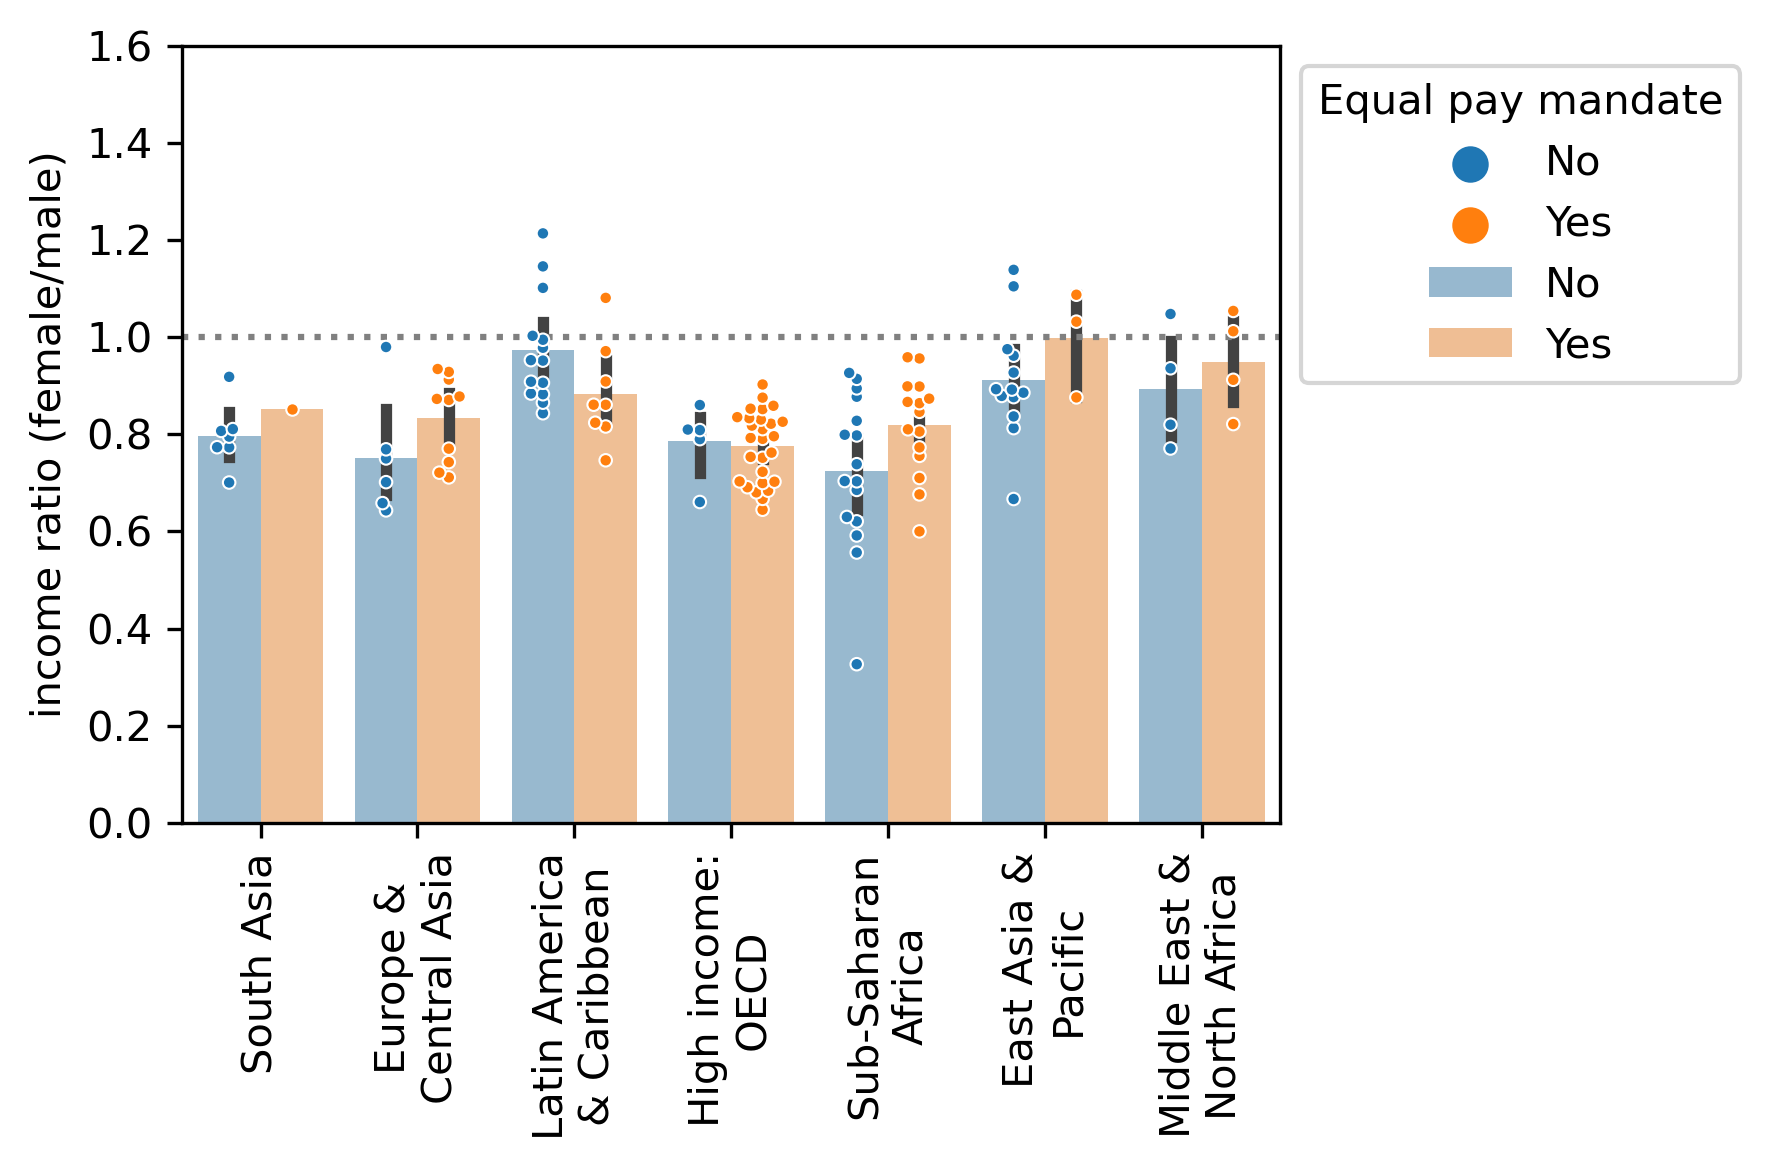

In [60]:
b = plt.subplots(figsize=(6,4), dpi=300)
b = sns.swarmplot(data=df8, x='region', y='ratio', hue='Equal pay mandate', 
                  dodge=True, size=3, edgecolor='white', linewidth=0.5)
b = sns.barplot(data=df8, x='region', y='ratio', hue='Equal pay mandate', alpha=0.5)
b.set(ylim=(0,1.6), xlabel='', ylabel='income ratio (female/male)')
plt.axhline(1, color='gray', ls='dotted')
wrap_labels(b,13)
sns.move_legend(b, 'upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.savefig('figure6_regions.png')

In [61]:
# countries that have f/m income ratio 0.9 or more 

df11 = df8[df8['ratio']>=0.9]
df11.head()

,country,region,country_group,year_b,ratio,pay_score_b,Equal pay mandate,law_score_b
1,Albania,Europe & Central Asia,Upper middle income,2020,0.934241,100,Yes,1
7,Bangladesh,South Asia,Lower middle income,2017,0.918125,25,No,0
20,Colombia,Latin America & Caribbean,Upper middle income,2021,1.002577,50,No,0
21,Costa Rica,Latin America & Caribbean,Upper middle income,2021,0.970971,75,Yes,1
27,Dominican Republic,Latin America & Caribbean,Upper middle income,2021,0.905910,75,No,0


In [62]:
df11.shape

(35, 8)

In [63]:
# interesting that Bangladesh's ratio is incongruent with its pay score 

df11_sorted = df11.sort_values('ratio')
df11_sorted

,country,region,country_group,year_b,ratio,pay_score_b,Equal pay mandate,law_score_b
92,Sweden,High income: OECD,High income,2020,0.902375,100,Yes,1
27,Dominican Republic,Latin America & Caribbean,Upper middle income,2021,0.905910,75,No,0
129,Suriname,Latin America & Caribbean,Upper middle income,2016,0.908050,75,No,0
73,Paraguay,Latin America & Caribbean,Upper middle income,2021,0.908535,100,Yes,1
83,Saudi Arabia,Middle East & North Africa,High income,2020,0.912027,25,Yes,1
98,Türkiye,Europe & Central Asia,Upper middle income,2021,0.912511,75,Yes,1
35,Gambia,Sub-Saharan Africa,Low income,2018,0.913982,75,No,0
7,Bangladesh,South Asia,Lower middle income,2017,0.918125,25,No,0
111,Cape Verde,Sub-Saharan Africa,Lower middle income,2015,0.926235,75,No,0
86,Singapore,East Asia & Pacific,High income,2020,0.926890,75,No,0


In [64]:
# just looking at WB data, do higher income countries have better gender pay scores? 

country_income_score = df8.groupby('country_group')['pay_score_b'].agg([np.mean, np.median, 'count'])
country_income_score

,mean,median,count
country_group,,,
High income,86.046512,100.0,43
Low income,50.000000,50.0,17
Lower middle income,59.285714,50.0,35
Upper middle income,71.052632,75.0,38


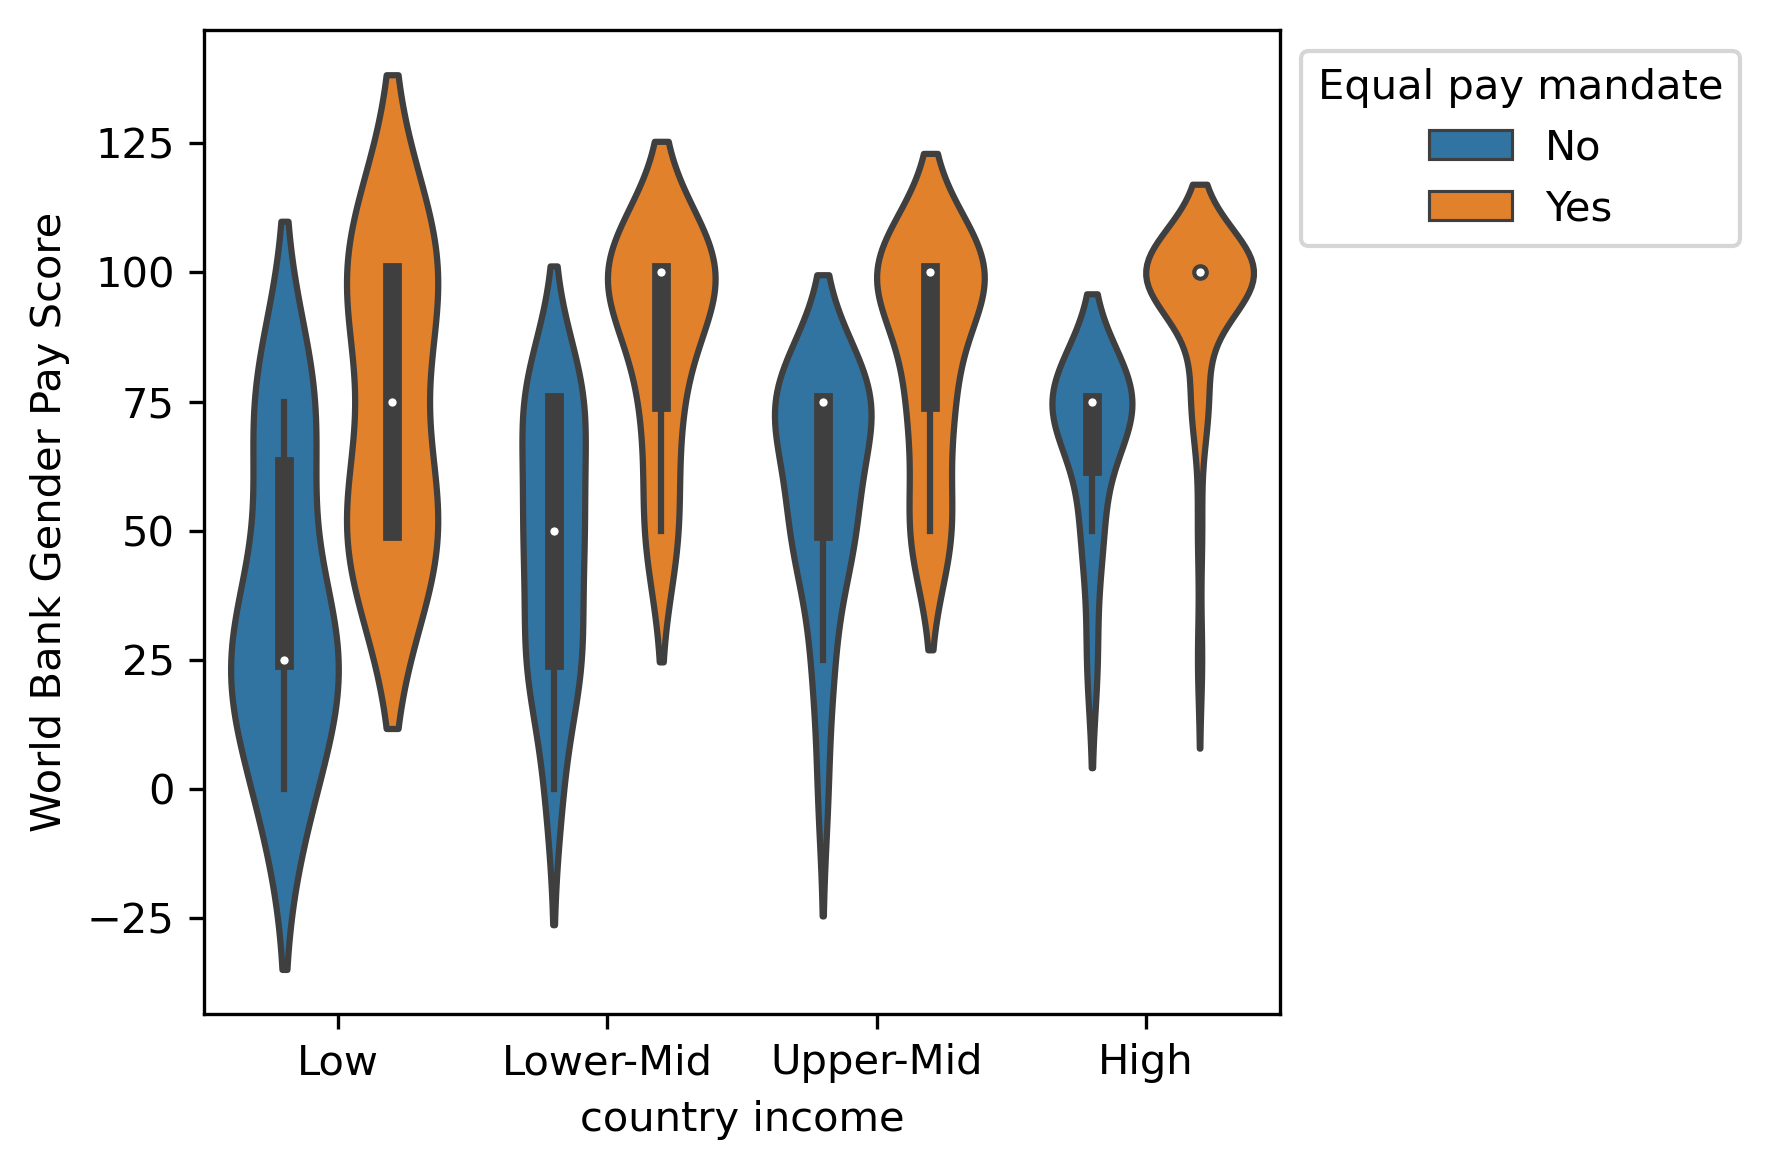

In [65]:
group_order=['Low income','Lower middle income','Upper middle income','High income']
group_labels=['Low', 'Lower-Mid', 'Upper-Mid', 'High']


a = plt.subplots(figsize=(6,4), dpi=300)
a = sns.violinplot(data=df8, x='country_group', order=group_order, y='pay_score_b', hue='Equal pay mandate')
a.set_xticklabels(group_labels)
a.set(xlabel='country income', ylabel='World Bank Gender Pay Score')
sns.move_legend(a, 'upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.savefig('figure7_countryincome_payscore_equalpaymandate.png')

Takeaways so far
1. Countries with equal pay mandates do not seem to have smaller gender pay gaps 
2. On average, low income countries have the lowest female/male income ratio
3. High income countries tend to score higher on the World Bank's Gender Pay Score 

Suggestions for future directions 
1. Look at historical gender pay gap (over a longer period of time) and determine whether there's a lag (and how long) between passing equal pay laws and seeing a meaningful increase in the f/m income ratio
2. Look into occupations/fields by most women vs. least women and see how the gender pay gaps look there (bonus points if it includes longitudinal data) 